# Insurance Claims- Fraud Detection

<strong>Problem Statement:</strong>
    
<strong>Business case:</strong>
    
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [214]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # Required to display all columns

In [215]:
#Import Dataset

df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [216]:
df.shape

(1000, 40)

In [217]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We see that all records of _c39 are null and therefore, there is no need to keep this column, We should delete it right away.

In [218]:
df.drop('_c39',axis=1,inplace=True)

In [219]:
df.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y


So we have succesfully dropped the _c39 columns and now we can proceed with Data description

In [220]:
# Lets convert the columns which are having data as Yes and No using Label encoder.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:  # for 2 or fewer unique categories
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1       
print('%d columns were label encoded successfully' % le_count)

2 columns were label encoded successfully


In [221]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


In [222]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

- The dataset includes from how many months the customer is associated with the Insurance company, customer's age, Policy Number (unique for each customer),policy_bind_date : When your agent binds a policy, it means that he or she, as a representative of the insurance company, confirms that coverage is in place.The data when the policy is bound is the policy_bind_date, policy state etc.

- The dataset further has data about how much annual premium the customer is paying,customer's gender, occupation, hobbies,relationship.

- CSL : It is the combined single limit. In the given example, your policy would be providing you with a maximum of 250 of bodily injury liability per person with a maximum amount per accident of 500.  If you seriously injured one person in an accident you would have 250 of liability protection to offer them in compensation for their loss (medical expenses).  If two people were injured in the accident, your policy could provide up to 500 for that accident, but not more than the 250 limit per person.

- The dataset also include the capital gain,loss, policy taken for which type(Vehicle etc), its severity, the location, city and hour where the incident took place, how many vehicles were involved, if it was reported to Police or not

- Also it contains information about if any witness is invloved,any property or body damage,Is the policy report available or not, and what is the total claim amount. Is it the injury claim, property claim or vehicle claim,

- Finally our target column is the report reported or not

# Data Cleaning
- If we see the data we see few ? which is nothing but nan values.This needs to be handled.
- Also lets check if the data is unique or not, if there are 1000 different values for ctaegorical columns(like IDs) or only 1 value in the whole dataset, there is no need to keep such columns,so we will drop them.

In [223]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

- We see Policy_Number is nothing but the ID associated to each customer for one policy and it hold no importance, hence its safe to delete.
- Also Incident_Location is also safe to delete.
- Insured zip and policy_bind_date should also be deleted as these two columns also holds no importance to us.
- Also, incident_date is nothing but the date on which incident happened, and it will not give us any valuable information, so we will drop this column too.

In [224]:
df.drop(['policy_number','policy_bind_date','insured_zip','incident_location','incident_date'],axis=1,inplace=True)

In [225]:
df.shape

(1000, 34)

In [226]:
# We see '?' in the datset which we will remove by NaN Values
df = df.replace('?',np.NaN)
df.isnull().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim      

police_report_available,property_damage and collision_type has null values. Lets examine what are the values available in these columns.

In [227]:
set(df['police_report_available'])

{'NO', 'YES', nan}

In [228]:
set(df['property_damage'])

{'NO', 'YES', nan}

In [229]:
set(df['collision_type'])

{'Front Collision', 'Rear Collision', 'Side Collision', nan}

In [230]:
# we will replace the '?' by NA meaning Not Available as we are unaware of the type.
df['collision_type'].fillna('NA', inplace = True)

For police_report_available and property_damage, we dont have information, so this is not available, in other words, lets fill them with NA

In [231]:
df['property_damage'].fillna('NA', inplace = True)
df['police_report_available'].fillna('NA', inplace = True)

In [232]:
#Check any null values.
df.isnull().sum().sum()

0

So we see there are no null records in our datatset and now we will proceed with checking if there are any Duplicates in our dataset.

# Check Duplicates

In [233]:
duplicate = df[df.duplicated(keep = 'last')]
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported


There are no duplicates in our dataset.

In [234]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

<strong>fraud_reported</strong>

Count of Fraud Reported
Total number of Fraud Reported :  2
Fraud Reported Counts :
 0    753
1    247
Name: fraud_reported, dtype: int64


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

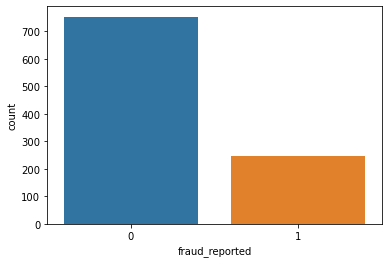

In [235]:
print('Count of Fraud Reported')
print("="*30)
print("Total number of Fraud Reported : ",df['fraud_reported'].nunique())
print("="*30)
counts = df['fraud_reported'].value_counts()
print('Fraud Reported Counts :'"\n",counts)
print("="*30)
sns.countplot(df['fraud_reported'])

The dataset is a bot imbalance, Hence auc_roc will be our metric and we will use SMOTE to deal with the imbalance dataset for our model buildings

<strong>months_as_customer</strong>

<AxesSubplot:xlabel='months_as_customer', ylabel='Count'>

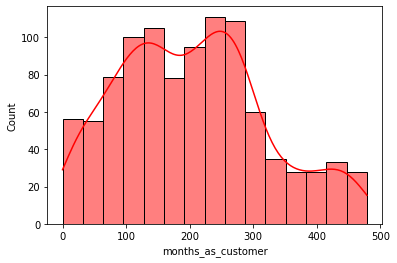

In [236]:
sns.histplot(df['months_as_customer'],color="red",kde=True,stat="count")

The above graph shows us from how many months the customers are associated with us.

<AxesSubplot:xlabel='age', ylabel='Count'>

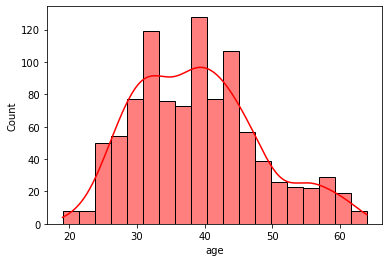

In [237]:
sns.histplot(df['age'],color="red",kde=True,stat="count")

The above graph gives us information about the age of the policy holders, 19 to 64 available in our dataset

In [238]:
df["AgeGroup"]=np.where((df["age"]>=19)&(df["age"]<=24),"Youth",
                         np.where((df["age"]>24)&(df["age"]<=40),"Adult",
                         np.where((df["age"]>40)&(df["age"]<=50),"Senior",
                         np.where((df["age"]>50)&(df["age"]<=55),"Super Senior","Old"))))

Count of Age Groups
Total number of Age Groups :  5
AgeGroup Counts :
 Adult           567
Senior          293
Old              64
Super Senior     50
Youth            26
Name: AgeGroup, dtype: int64


<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

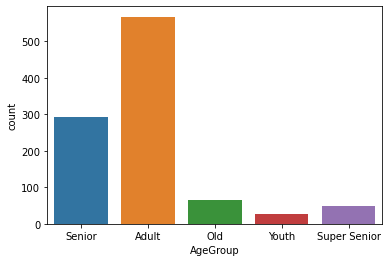

In [239]:
print('Count of Age Groups')
print("="*30)
print("Total number of Age Groups : ",df['AgeGroup'].nunique())
print("="*30)
dep_counts = df['AgeGroup'].value_counts()
print('AgeGroup Counts :'"\n",dep_counts)
print("="*30)
sns.countplot(x="AgeGroup", data=df)

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

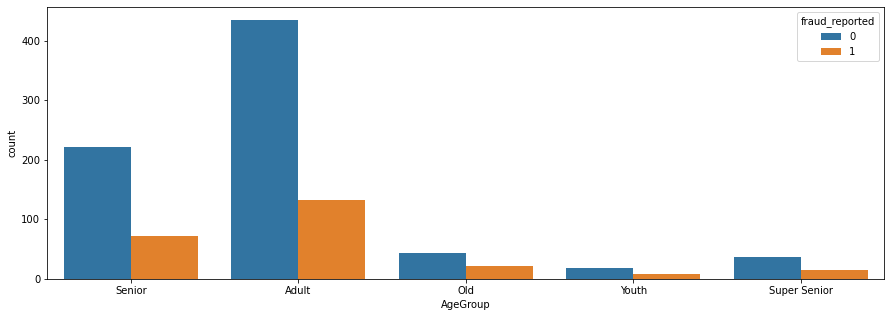

In [240]:
plt.figure(figsize=(15,5))
sns.countplot(x="AgeGroup",hue="fraud_reported",data=df)

In [241]:
checkAgeGroup=np.where((df['AgeGroup']=="Adult") & (df['fraud_reported']=="Y"))
checkAgeGroup=df.iloc[checkAgeGroup]
checkAgeGroup.shape

(0, 35)

- So we see that maximum fraud(23.28%) were detected in the Adult age group[24-40], having total count of 132 out of 567
- Now we will drop AgeGroup as it is not required further.

In [242]:
df.drop('AgeGroup',axis=1,inplace=True)

<strong>policy_state</strong>

Count of each Policy State
 OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


<AxesSubplot:xlabel='policy_state', ylabel='count'>

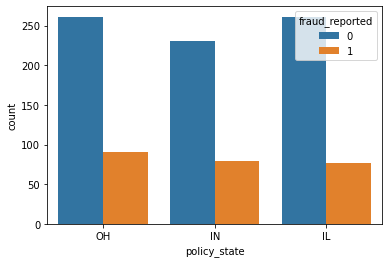

In [243]:
counts = df['policy_state'].value_counts()
print("Count of each Policy State""\n",counts)
sns.countplot(x="policy_state",hue="fraud_reported",data=df)

There is not much difference in the count of policy state and fraud reported, However OH has maximum counts.

<strong>policy_csl<strong>

Count of each Policy CSL
 250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


<AxesSubplot:xlabel='policy_csl', ylabel='count'>

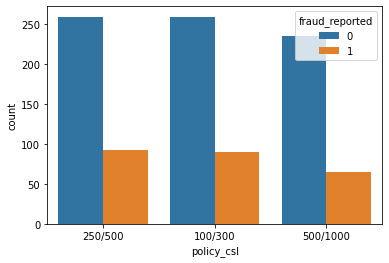

In [244]:
counts = df['policy_csl'].value_counts()
print("Count of each Policy CSL""\n",counts)
sns.countplot(x="policy_csl",hue="fraud_reported",data=df)

- The count of Combined signle limit policy is also same for 250/500 and 100/300(351 and 349 respectively).
- Fraud deteced is also same for 250/500 and 100/300(92 and 90 respectively)

<strong>policy_deductable</strong>

Count of each Policy Deductable
 1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

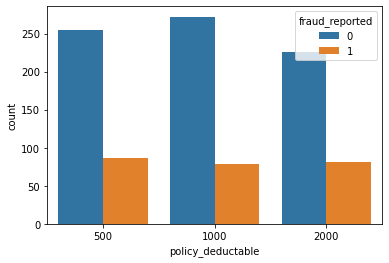

In [245]:
counts = df['policy_deductable'].value_counts()
print("Count of each Policy Deductable""\n",counts)
sns.countplot(x="policy_deductable",hue="fraud_reported",data=df)

The graph shows that fraud_reported has no major difference in the three different policy deductable amounts

<strong>policy_annual_premium</strong>

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Count'>

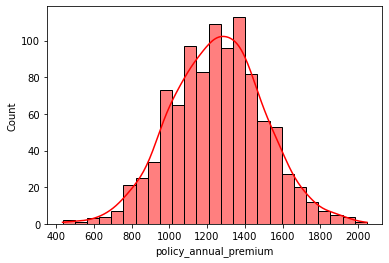

In [246]:
sns.histplot(df['policy_annual_premium'],color="red",kde=True,stat="count")

Policy Annual Premium looks like a normal ditribution graph, lets divide it into four set and analyse the data with fraud detection.

In [247]:
df["AnnualPremiumRange"]=np.where((df["policy_annual_premium"]>=433)&(df["policy_annual_premium"]<=600),"RangeTill600",
                         np.where((df["policy_annual_premium"]>600)&(df["policy_annual_premium"]<=1000),"Range600To1000",
                         np.where((df["policy_annual_premium"]>1000)&(df["policy_annual_premium"]<=1400),"Range1000To1400",
                         np.where((df["policy_annual_premium"]>1400)&(df["policy_annual_premium"]<=1800),"Range1400To1800",
                         "RangeAbove1800"))))

<AxesSubplot:xlabel='AnnualPremiumRange', ylabel='count'>

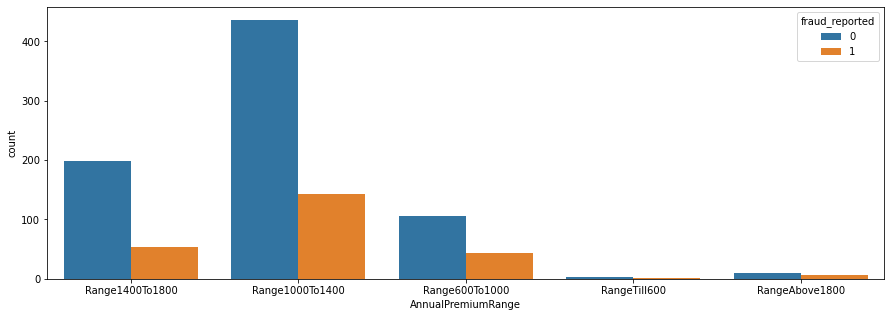

In [248]:
plt.figure(figsize=(15,5))
sns.countplot(x="AnnualPremiumRange",hue="fraud_reported",data=df)

- The maximum fraud is detected where the customer is paying the annual premium in the range of 1000 to 1400
- Now we will delete the column AnnualPremiumRange as it is not required.

In [249]:
df.drop('AnnualPremiumRange',axis=1,inplace=True)

<strong>umbrella_limit</strong>

Count of each Umbrella Limit
  0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64


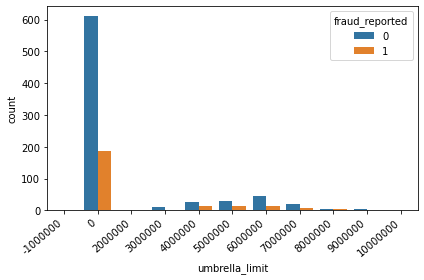

In [250]:
counts = df['umbrella_limit'].value_counts()
print("Count of each Umbrella Limit""\n",counts)
ax = sns.countplot(x="umbrella_limit", data=df,hue='fraud_reported')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

The maximum fraud was detected when there is no umbrella limit

<strong>insured_sex</strong>

Count of each Gender
 0    537
1    463
Name: insured_sex, dtype: int64


<AxesSubplot:xlabel='insured_sex', ylabel='count'>

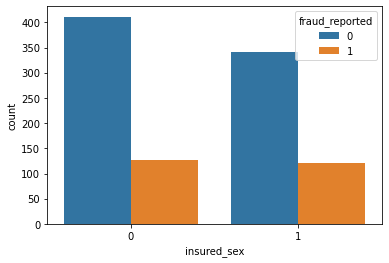

In [251]:
counts = df['insured_sex'].value_counts()
print("Count of each Gender""\n",counts)
sns.countplot(x="insured_sex",hue="fraud_reported",data=df)

In [252]:
checkGender_Female=np.where((df['insured_sex']=="FEMALE") & (df['fraud_reported']=="Y"))
checkGender_Female=df.iloc[checkGender_Female]
checkGender_Female.shape

(0, 34)

In [253]:
checkGender_Male=np.where((df['insured_sex']=="MALE") & (df['fraud_reported']=="Y"))
checkGender_Male=df.iloc[checkGender_Male]
checkGender_Male.shape

(0, 34)

- <strong>We see that frauds were reported more for female customers in count but less in percentage.</strong>
- Frauds were reported for 126 females out of 537 females (23.46%).
- Frauds were reported for 121 males out of 463 females (26.13%).

<strong>insured_education_level</strong>

Count of each Education Level
 JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


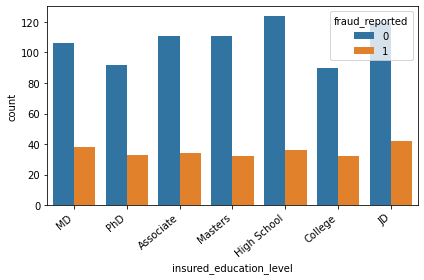

In [254]:
counts = df['insured_education_level'].value_counts()
print("Count of each Education Level""\n",counts)
ax = sns.countplot(x="insured_education_level", data=df,hue='fraud_reported')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Frauds were reported more for one whose education level is JD(Juris Doctor, an undergraduate program)

Count of Insured Occupation
 machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


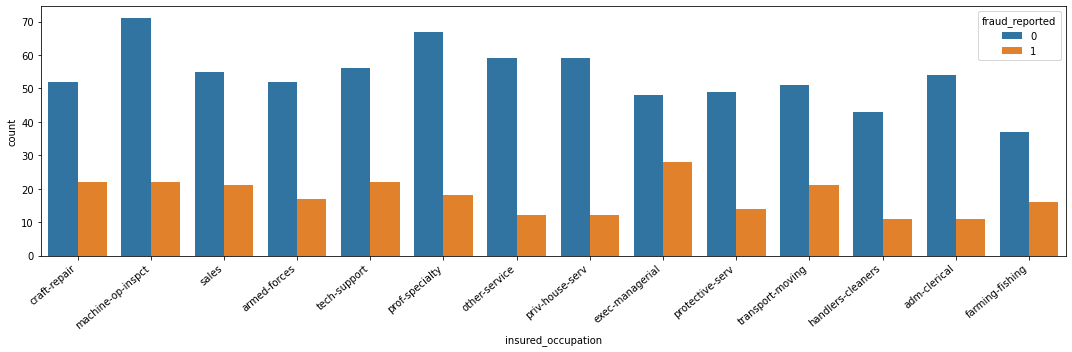

In [255]:
counts = df['insured_occupation'].value_counts()
print("Count of Insured Occupation""\n",counts)
f, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x="insured_occupation", data=df,hue='fraud_reported')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Frauds were detected as Yes maximum for whose occupation is Exec-managerial and almost each and every Occuation has similar frauds reported, So it is safe to delete this columns.

In [256]:
df.drop("insured_occupation",axis=1,inplace=True)

<strong>insured_hobbies</strong>

Count of Insured Hobbies
 reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


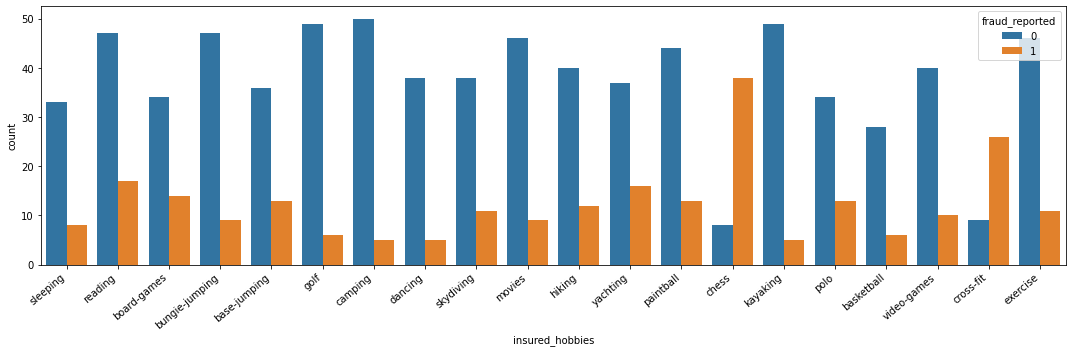

In [257]:
counts = df['insured_hobbies'].value_counts()
print("Count of Insured Hobbies""\n",counts)
f, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x="insured_hobbies", data=df,hue='fraud_reported')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

- Frauds were reported more whose hobby is to play Chess and then cross-fit, all other have almost same records less than 20

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

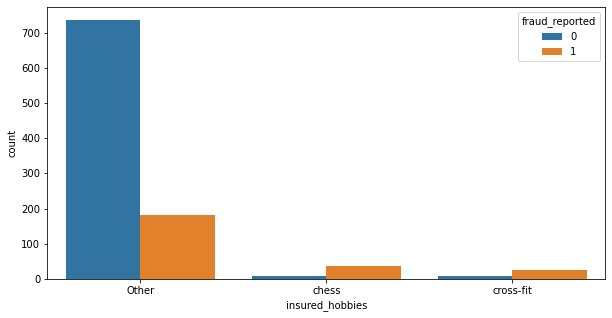

In [258]:
df['insured_hobbies']=df['insured_hobbies'].apply(lambda x :'Other' if x!='chess' and x!='cross-fit' else x)
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)

Count of Insured Relationship
 own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


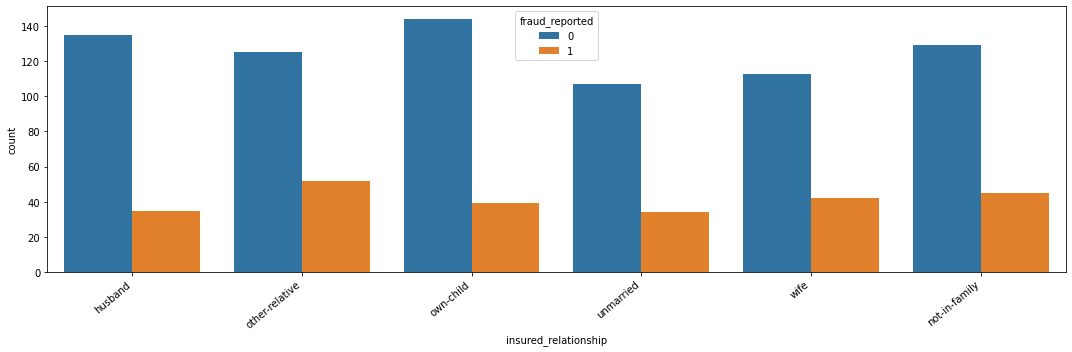

In [259]:
counts = df['insured_relationship'].value_counts()
print("Count of Insured Relationship""\n",counts)
f, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x="insured_relationship", data=df,hue='fraud_reported')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

As per the above graph, the most fraud reported were from other relatives

<AxesSubplot:xlabel='capital-gains', ylabel='Count'>

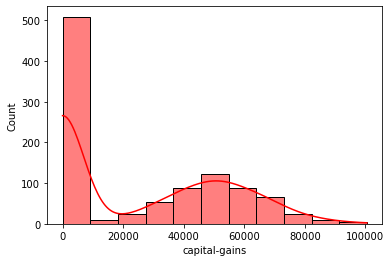

In [260]:
sns.histplot(df['capital-gains'],color="red",kde=True,stat="count")

Capital gain is the difference between the selling price and loss price. We see that there are maximum records (508) when there is no capital gain.

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

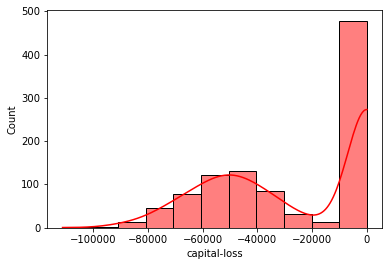

In [261]:
sns.histplot(df['capital-loss'],color="red",kde=True,stat="count")

Cpiatl loss is the difference between cost price and selling price, We see that maximum of the count is 0 here.

Count of Incident Type
 Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


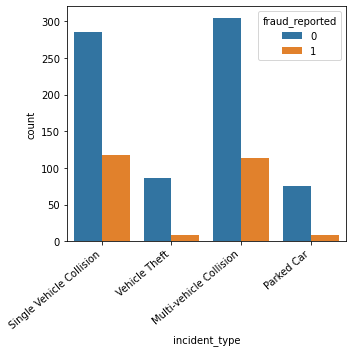

In [262]:
counts = df['incident_type'].value_counts()
print("Count of Incident Type""\n",counts)
f, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="incident_type", data=df,hue='fraud_reported')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Fraud reported were maximum for Single Vehicle Collision and then Multi-vehicle collision

<strong>collision_type</strong>

Count of Collision Type
 Rear Collision     292
Side Collision     276
Front Collision    254
NA                 178
Name: collision_type, dtype: int64


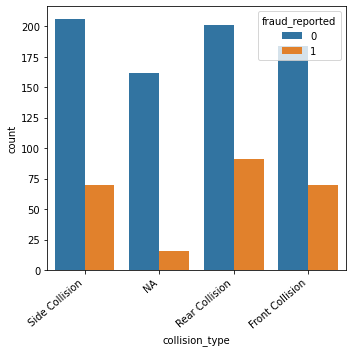

In [263]:
counts = df['collision_type'].value_counts()
print("Count of Collision Type""\n",counts)
f, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="collision_type", data=df,hue='fraud_reported')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Fraud were reported more when there were rear collision

Count of Incident Severity
 Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


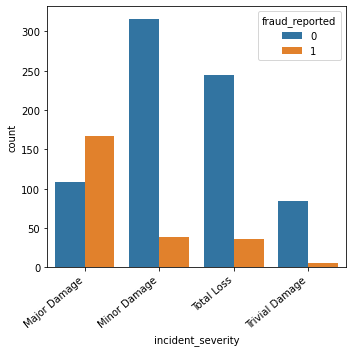

In [264]:
counts = df['incident_severity'].value_counts()
print("Count of Incident Severity""\n",counts)
f, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="incident_severity", data=df,hue='fraud_reported')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Maximum frauds reported yes when the Incident severity was Major damage

Count of authorities_contacted
 Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


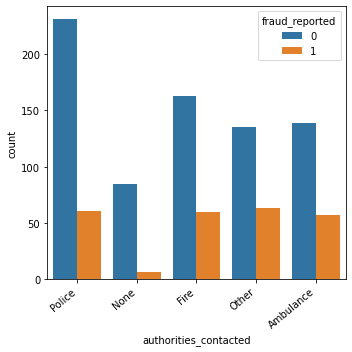

In [265]:
counts = df['authorities_contacted'].value_counts()
print("Count of authorities_contacted""\n",counts)
f, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="authorities_contacted", data=df,hue='fraud_reported')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In maximum cases, fraud reported to yes was from other authorities, followed by fire,ambulance and police

Count of incident_state
 NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


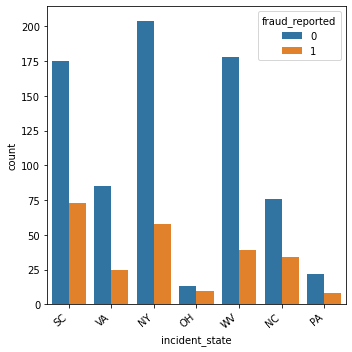

In [266]:
counts = df['incident_state'].value_counts()
print("Count of incident_state""\n",counts)
f, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="incident_state", data=df,hue='fraud_reported')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Maximum fraud cases as per the above graph were reported from South California (SC).

Count of incident_city
 Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


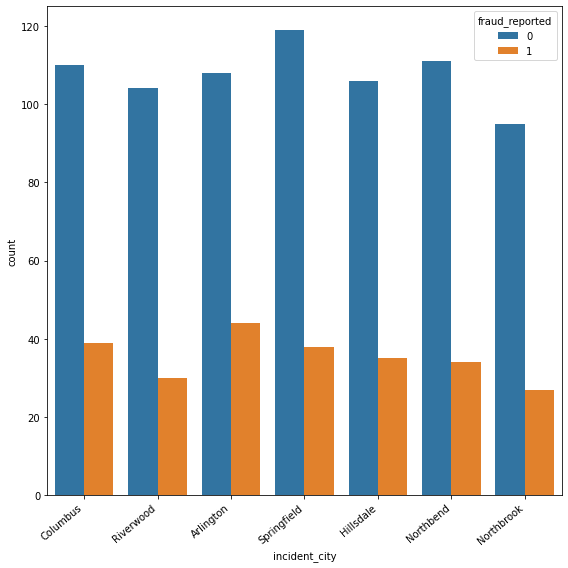

In [267]:
counts = df['incident_city'].value_counts()
print("Count of incident_city""\n",counts)
f, ax = plt.subplots(figsize=(8,8))
ax = sns.countplot(x="incident_city", data=df,hue='fraud_reported')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Maximum fraud cases were reported from the city Arlington

Count of number_of_vehicles_involved
 1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


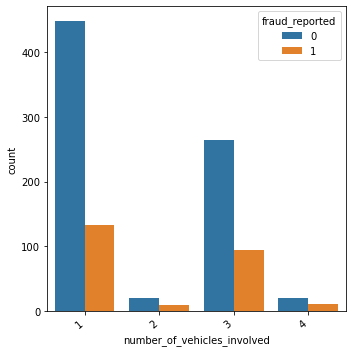

In [268]:
counts = df['number_of_vehicles_involved'].value_counts()
print("Count of number_of_vehicles_involved""\n",counts)
f, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="number_of_vehicles_involved", data=df,hue='fraud_reported')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Maximum fraude reported were there were only one vehicle involved

Count of property_damage
 NA     360
NO     338
YES    302
Name: property_damage, dtype: int64


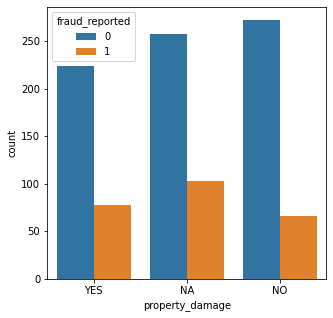

In [269]:
counts = df['property_damage'].value_counts()
print("Count of property_damage""\n",counts)
f, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="property_damage", data=df,hue='fraud_reported')

The maximum frauds were reported when there was no property damage

Count of bodily_injuries
 0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


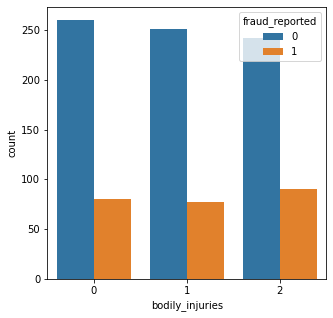

In [270]:
counts = df['bodily_injuries'].value_counts()
print("Count of bodily_injuries""\n",counts)
f, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="bodily_injuries", data=df,hue='fraud_reported')

Frauds reported where more when they were 2 body injuries

Count of witnesses
 1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


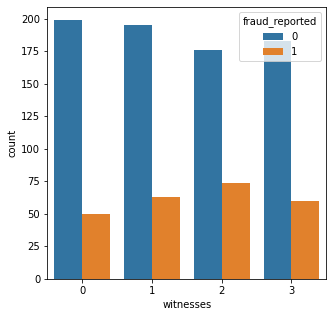

In [271]:
counts = df['witnesses'].value_counts()
print("Count of witnesses""\n",counts)
f, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="witnesses", data=df,hue='fraud_reported')

When there were 2 witnesses, frauds were more reported

Count of police_report_available
 NA     343
NO     343
YES    314
Name: police_report_available, dtype: int64


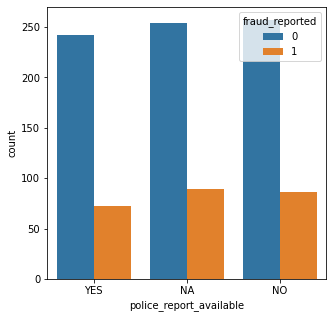

In [272]:
counts = df['police_report_available'].value_counts()
print("Count of police_report_available""\n",counts)
f, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="police_report_available", data=df,hue='fraud_reported')

- Frauds were reported more whene there was no police report available
-  Company can ask for police report to avoid any fraud in future

In [273]:
df["TotalClaimAmountRange"]=np.where((df["total_claim_amount"]>=100)&(df["total_claim_amount"]<=10000),"ClaimUpto_10K",
                         np.where((df["total_claim_amount"]>10000)&(df["total_claim_amount"]<=25000),"Claim_10K-25K",
                         np.where((df["total_claim_amount"]>25000)&(df["total_claim_amount"]<=50000),"Claim_25K-50K",
                         np.where((df["total_claim_amount"]>50000)&(df["total_claim_amount"]<=72000),"Claim_50K-72K",
                         "ClaimAbove_72K"))))

<AxesSubplot:xlabel='TotalClaimAmountRange', ylabel='count'>

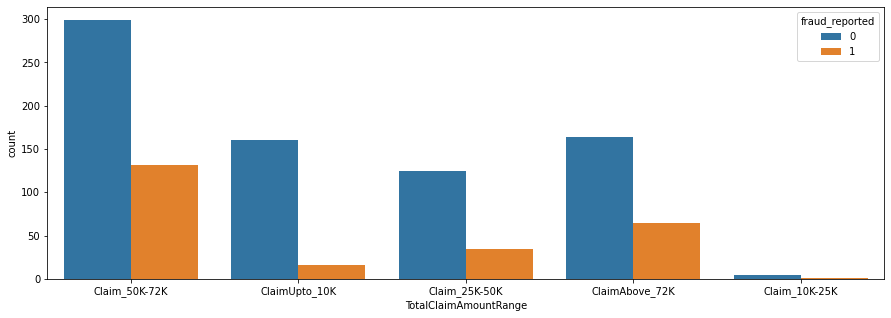

In [274]:
plt.figure(figsize=(15,5))
sns.countplot(x="TotalClaimAmountRange",hue="fraud_reported",data=df)

- We notice that maximum frauds were reported when the Total Claim amount is above 50000
- Now since we are done with the analysis of Total Claims, lets drop this column

In [275]:
df.drop('TotalClaimAmountRange',axis=1,inplace=True)

In [276]:
df["InjuryClaimRange"]=np.where((df["injury_claim"]>=0)&(df["injury_claim"]<=5000),"ClaimUpto_5K",
                         np.where((df["injury_claim"]>5000)&(df["injury_claim"]<=10000),"Claim_5K-10K",
                         np.where((df["injury_claim"]>10000)&(df["injury_claim"]<=15000),"Claim_10K-15K",
                         np.where((df["injury_claim"]>15000)&(df["injury_claim"]<=17000),"Claim_15K-17K",
                         "ClaimAbove_17K"))))

<AxesSubplot:xlabel='InjuryClaimRange', ylabel='count'>

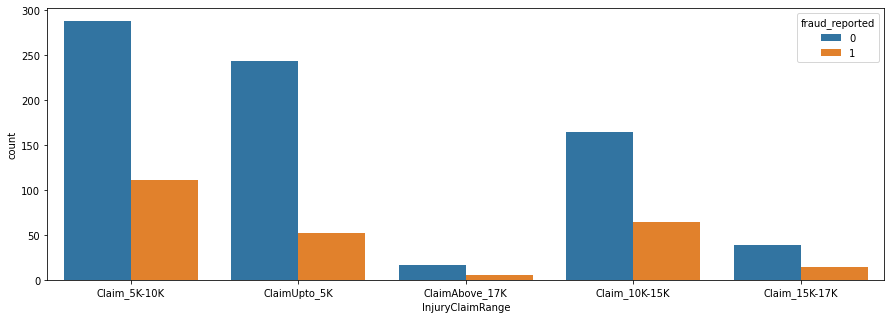

In [277]:
plt.figure(figsize=(15,5))
sns.countplot(x="InjuryClaimRange",hue="fraud_reported",data=df)

- From the graph we notice that when the claim amount is between 5K-10K, we have the maximum fraud.
- We will drop the InjuryClaimRange column now as we are done with our analysis

In [278]:
df.drop('InjuryClaimRange',axis=1,inplace=True)

In [279]:
df["PropertyClaimRange"]=np.where((df["property_claim"]>=0)&(df["property_claim"]<=5000),"ClaimUpto_5K",
                         np.where((df["property_claim"]>5000)&(df["property_claim"]<=10000),"Claim_5K-10K",
                         np.where((df["property_claim"]>10000)&(df["property_claim"]<=15000),"Claim_10K-15K",
                         np.where((df["property_claim"]>15000)&(df["property_claim"]<=17000),"Claim_15K-17K",
                         "ClaimAbove_17K"))))

<AxesSubplot:xlabel='PropertyClaimRange', ylabel='count'>

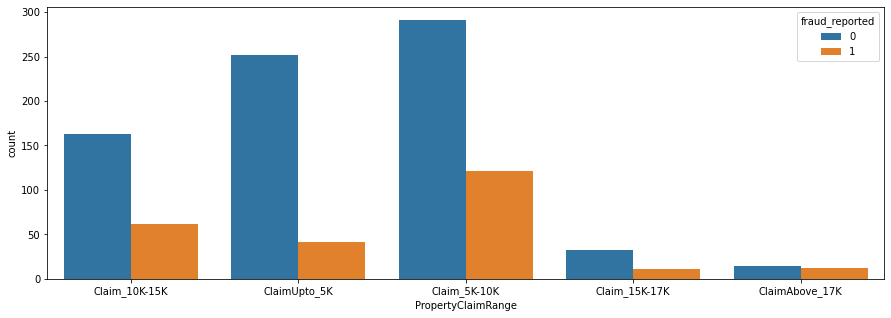

In [280]:
plt.figure(figsize=(15,5))
sns.countplot(x="PropertyClaimRange",hue="fraud_reported",data=df)

- From the graph we notice that when the property claim amount is between 5000-10000,and then 10000-15000 we have the maximum fraud.
- We will drop the PropertyClaimRange column now as we are done with our analysis

In [281]:
df.drop('PropertyClaimRange',axis=1,inplace=True)

In [282]:
df["VehicleClaimRange"]=np.where((df["vehicle_claim"]>=0)&(df["vehicle_claim"]<=30000),"ClaimUpto_30K",
                         np.where((df["vehicle_claim"]>30000)&(df["vehicle_claim"]<=40000),"Claim_30K-40K",
                         np.where((df["vehicle_claim"]>40000)&(df["vehicle_claim"]<=45000),"Claim_40K-45K",
                         np.where((df["vehicle_claim"]>45000)&(df["vehicle_claim"]<=51000),"Claim_45K-51K",
                         "ClaimAbove_51K"))))

<AxesSubplot:xlabel='VehicleClaimRange', ylabel='count'>

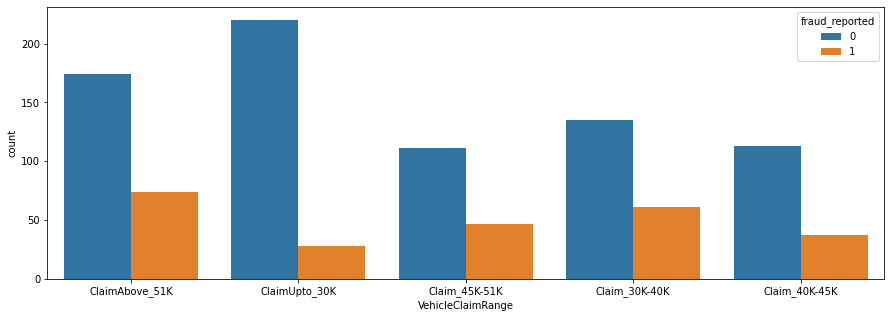

In [283]:
plt.figure(figsize=(15,5))
sns.countplot(x="VehicleClaimRange",hue="fraud_reported",data=df)

- From the graph we notice that when the vehcile claim amount is above 51000 we have the maximum fraud. 
- Also point to be noticed that that anything above 50822.50 is above the third quantile range.
- We will drop the VehicleClaimRange column now as we are done with our analysis

In [284]:
df.drop('VehicleClaimRange',axis=1,inplace=True)

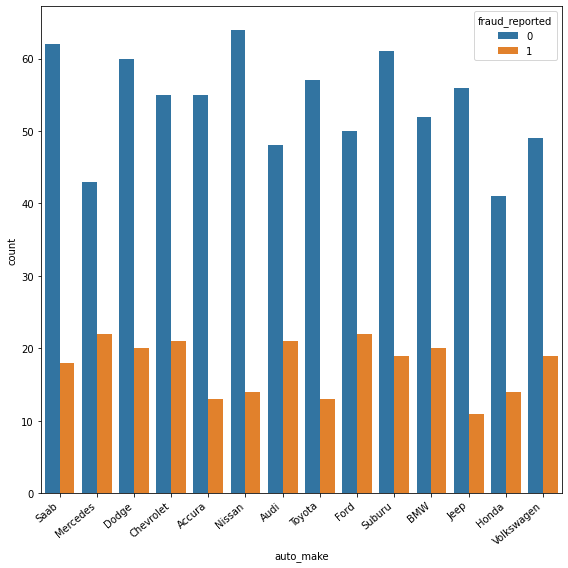

In [285]:
f, ax = plt.subplots(figsize=(8,8))
ax = sns.countplot(x="auto_make", data=df,hue='fraud_reported')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Ford,Mercedes Chevrolet and Audi have the maximum fraud reported.

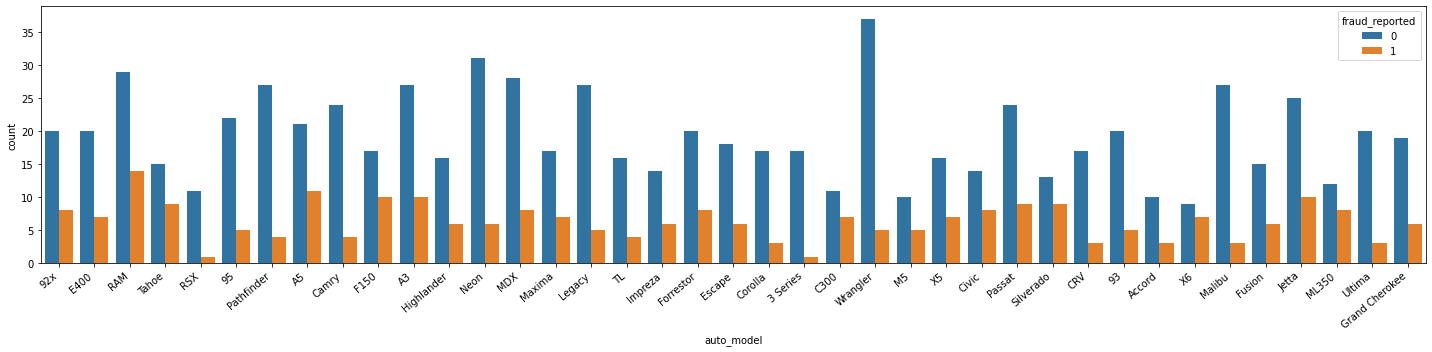

In [286]:
f, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="auto_model", data=df,hue='fraud_reported')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

From the graph, we see that the model RAM, has the maximum fraud reported and almost each and every model has reported fraud, so it holds no importance to our dataset, Hence we can delete this column.

In [287]:
df.drop("auto_model",axis=1,inplace=True)

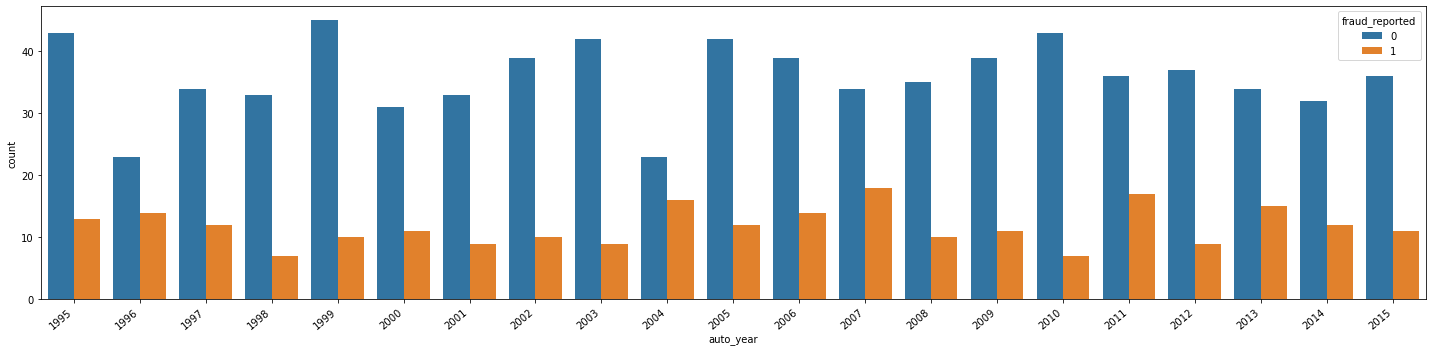

In [288]:
f, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="auto_year", data=df,hue='fraud_reported')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

- We see that maximum frauds were reported in 2007 and 2011 but we dont see any pattern here.

In [289]:
df.shape

(1000, 32)

# Heatmap

<AxesSubplot:>

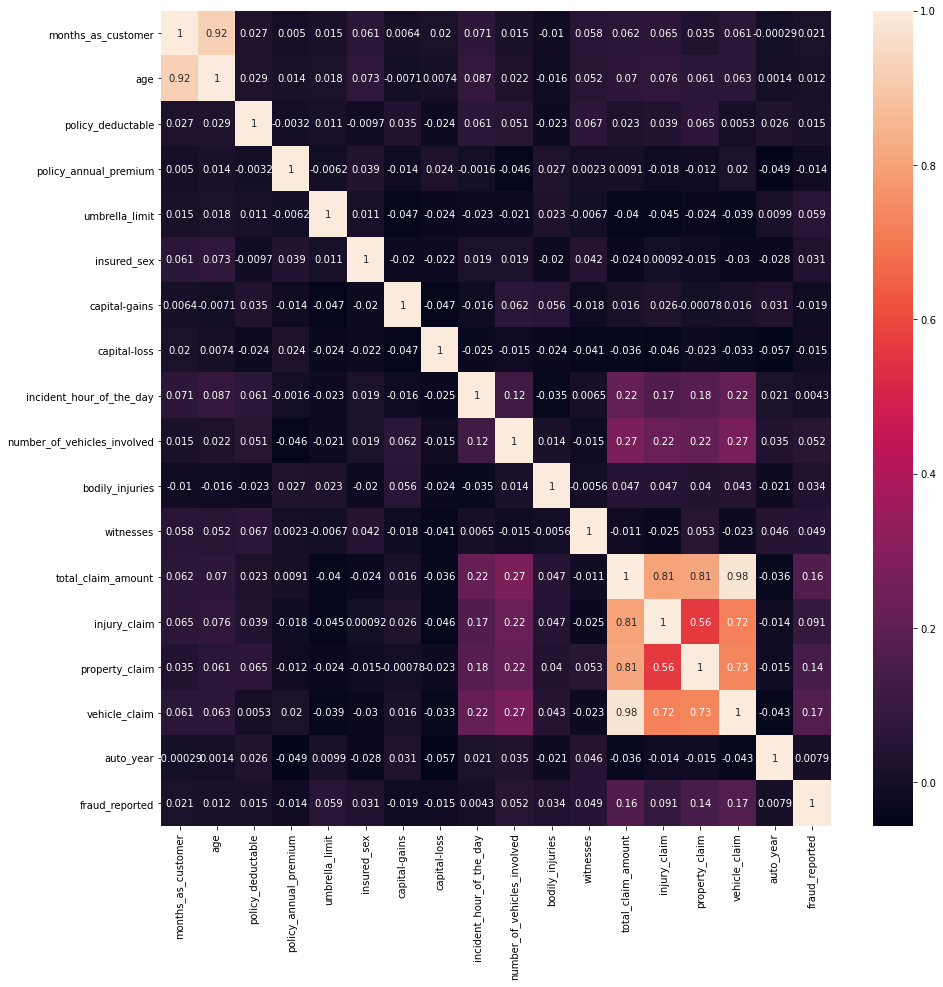

In [290]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

From the Heatmap we observe below things:
- Total_claim_amount and vehicle_claim are correlated
- Total_claim_amount and property_claim are correlated
- Total_claim_amount and injury_claim are correlated
- Its better to delete Total_claim_amount, otherwise we will have multicollinearity problem.

In [291]:
df.drop('total_claim_amount',axis=1,inplace=True)

In [292]:
df = pd.get_dummies(df)
df.shape

(1000, 90)

In [293]:
# Lets pick two samples to check the data
df.sample(2)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_hobbies_Other,insured_hobbies_chess,insured_hobbies_cross-fit,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_NA,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_NA,property_damage_NO,property_damage_YES,police_report_available_NA,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
900,1,33,2000,1391.63,0,1,61200,0,23,1,0,3,6940,6940,55520,2000,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
325,399,55,2000,995.56,0,1,0,-65400,23,3,1,1,17680,8840,61880,2010,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# BoxPlot

In [294]:
targetToPlot=df.loc[:, df.columns == 'fraud_reported']
targetToPlot.head(2)

,fraud_reported
0,1
1,1


In [295]:
dataToPlot=df.drop(columns= ['fraud_reported'])
dataToPlot.head(2)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_hobbies_Other,insured_hobbies_chess,insured_hobbies_cross-fit,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_NA,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_NA,property_damage_NO,property_damage_YES,police_report_available_NA,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328,48,1000,1406.91,0,1,53300,0,5,1,1,2,6510,13020,52080,2004,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,228,42,2000,1197.22,5000000,1,0,0,8,1,0,0,780,780,3510,2007,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


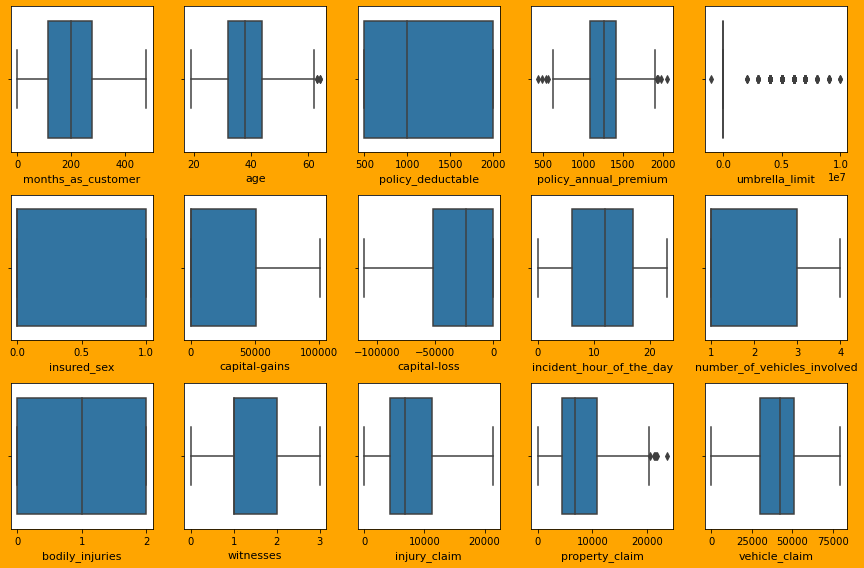

In [296]:
#Lets see data distribution now using Boxplot
# We willl plot just 15 columns as rest have been converted using One-Hot_Encoder technique and they will just have 0 and 1 values.
plt.figure(figsize=(12,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=15:
        ax=plt.subplot(3,5,graph)        
        sns.boxplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

We see very few Outliers in age, policy_annual_premium,property_claim,and small outlier in total_claim_amount, Lets see if it comes under threshold range

In [297]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(1000, 90)
(0, 90)


# Skewness

In [298]:
features=df.drop(columns=['fraud_reported'])
target=df[["fraud_reported"]]

In [299]:
features.shape, target.shape

((1000, 89), (1000, 1))

In [300]:
#Check Data Skewness
skew_df=pd.DataFrame({'Skewness':features.skew()}) 
skew_df

,Skewness
months_as_customer,0.362177
age,0.478988
policy_deductable,0.477887
policy_annual_premium,0.004402
umbrella_limit,1.806712
...,...
auto_make_Nissan,3.151969
auto_make_Saab,3.100934
auto_make_Suburu,3.100934
auto_make_Toyota,3.375671


In [301]:
print("Out of",len(features.skew()),"features",len(features.skew().loc[abs(features.skew())>0.5]) ,"are skewed")

Out of 89 features 74 are skewed


# Log1P Transformation

In [305]:
for index in features.skew().index:
    if features.skew().loc[index]>0.5:
        features[index]=np.log1p(features[index])
    if features.skew().loc[index]<-0.5:
        features[index]=np.square(features[index])
print(features.skew())
print("Out of",len(features.skew()),"features",len(features.skew().loc[abs(features.skew())>0.5]) 
      ,"are little skewed and we have improved the skewness to much extent")

months_as_customer       0.362177
age                      0.478988
policy_deductable        0.477887
policy_annual_premium    0.004402
umbrella_limit           1.493074
                           ...   
auto_make_Nissan         3.152344
auto_make_Saab           3.101562
auto_make_Suburu         3.101562
auto_make_Toyota         3.375000
auto_make_Volkswagen     3.437500
Length: 89, dtype: float64
Out of 89 features 72 are little skewed and we have improved the skewness to much extent


# StandardScaler

In [306]:
x= df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [307]:
x.shape,y.shape

((1000, 89), (1000,))

In [308]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_hobbies_Other,insured_hobbies_chess,insured_hobbies_cross-fit,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_NA,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_NA,property_damage_NO,property_damage_YES,police_report_available_NA,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,1.078140,0.990836,-0.222383,0.616705,-0.479476,1.076953,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,-0.189283,1.165505,0.749653,-0.183440,-0.714545,-0.670280,1.356801,-0.732187,1.359780,-0.654654,-0.411814,-0.372763,-0.436436,-0.438058,2.438123,-0.408486,-0.377964,0.296883,-0.219586,-0.190445,2.209605,-0.45897,-0.463753,-0.473276,-0.405147,-0.42829,-0.849218,-0.302825,1.217123,-0.322107,-0.583509,-0.465344,-0.642207,1.619626,1.619626,-0.740262,-0.62361,-0.314485,-0.493742,-0.535725,-0.316402,-0.496873,1.557131,-0.351562,-0.595830,-0.153432,-0.175863,1.741338,-0.351562,-0.52644,-0.423374,2.389856,-0.405147,-0.411814,-0.372763,-0.393363,-0.431555,-0.750000,-0.714545,1.520282,-0.722544,-0.722544,1.478078,-0.270114,-0.272239,-0.278543,-0.286794,-0.294884,-0.278543,-0.241249,-0.267976,-0.263664,-0.290859,3.391165,-0.294884,-0.274352,-0.270114
1,0.208995,0.334073,1.412784,-0.242521,1.697980,1.076953,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.363822,-1.372696,-1.823346,0.315491,-0.714545,1.491914,-0.737028,-0.732187,1.359780,-0.654654,-0.411814,-0.372763,-0.436436,-0.438058,2.438123,-0.408486,-0.377964,0.296883,-0.219586,-0.190445,-0.452570,-0.45897,2.156320,-0.473276,-0.405147,-0.42829,-0.849218,-0.302825,-0.821609,3.104561,-0.583509,2.148948,-0.642207,-0.617426,-0.617426,1.350873,-0.62361,-0.314485,-0.493742,-0.535725,-0.316402,-0.496873,1.557131,-0.351562,-0.595830,-0.153432,-0.175863,-0.574271,2.844452,-0.52644,-0.423374,-0.418435,-0.405147,-0.411814,-0.372763,2.542181,-0.431555,1.333333,-0.714545,-0.657773,1.383999,-0.722544,-0.676554,-0.270114,-0.272239,-0.278543,-0.286794,-0.294884,-0.278543,-0.241249,-0.267976,3.792706,-0.290859,-0.294884,-0.294884,-0.274352,-0.270114
2,-0.608002,-1.088913,1.412784,0.642233,1.697980,-0.928546,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,0.054644,-0.736072,-0.785565,0.315491,-0.714545,-0.670280,1.356801,1.365771,-0.735413,-0.654654,-0.411814,-0.372763,-0.436436,-0.438058,-0.410152,-0.4

# PCA

In [309]:
from sklearn.decomposition import PCA
pca=PCA()
test=pca.fit(x)

In [310]:
test.explained_variance_ratio_

array([6.73243967e-02, 2.98532972e-02, 2.49181118e-02, 2.32419409e-02,
       2.15367786e-02, 2.01744463e-02, 1.99756604e-02, 1.97371514e-02,
       1.95140964e-02, 1.90106583e-02, 1.87896426e-02, 1.86901039e-02,
       1.80363323e-02, 1.74857980e-02, 1.73992213e-02, 1.70241544e-02,
       1.67045714e-02, 1.64751042e-02, 1.62243119e-02, 1.60771916e-02,
       1.59257759e-02, 1.57087132e-02, 1.52600728e-02, 1.50799635e-02,
       1.47717604e-02, 1.45903083e-02, 1.43778577e-02, 1.41061336e-02,
       1.39487921e-02, 1.36663072e-02, 1.35094078e-02, 1.31532149e-02,
       1.29566354e-02, 1.29126271e-02, 1.26786512e-02, 1.25111236e-02,
       1.24719310e-02, 1.23691660e-02, 1.20867784e-02, 1.18143014e-02,
       1.16478881e-02, 1.15943018e-02, 1.15493890e-02, 1.14063148e-02,
       1.12902445e-02, 1.11984956e-02, 1.10037030e-02, 1.06976740e-02,
       1.05919468e-02, 1.05266274e-02, 1.04466091e-02, 1.03678413e-02,
       1.00362050e-02, 9.97851781e-03, 9.74154131e-03, 9.64138022e-03,
      

In [311]:
var_cumsum=np.cumsum(test.explained_variance_ratio_)*100
var_cumsum

array([  6.73243967,   9.71776938,  12.20958057,  14.53377466,
        16.68745252,  18.70489715,  20.70246319,  22.67617833,
        24.62758797,  26.5286538 ,  28.40761806,  30.27662845,
        32.08026168,  33.82884148,  35.56876362,  37.27117906,
        38.9416362 ,  40.58914663,  42.21157781,  43.81929697,
        45.41187456,  46.98274587,  48.50875316,  50.0167495 ,
        51.49392555,  52.95295638,  54.39074215,  55.80135551,
        57.19623472,  58.56286545,  59.91380622,  61.22912771,
        62.52479125,  63.81605397,  65.08391909,  66.33503145,
        67.58222454,  68.81914114,  70.02781898,  71.20924912,
        72.37403793,  73.53346812,  74.68840702,  75.8290385 ,
        76.95806295,  78.07791251,  79.17828281,  80.24805021,
        81.30724489,  82.35990762,  83.40456854,  84.44135267,
        85.44497317,  86.44282495,  87.41697908,  88.38111711,
        89.31827178,  90.24974432,  91.1562142 ,  92.0500529 ,
        92.93153195,  93.79212397,  94.64234232,  95.47

In [312]:
components=np.argmax(var_cumsum>90)
print('Number of components explaning 90% variance are :',components)

Number of components explaning 90% variance are : 57


Text(0, 0.5, 'Comulative explaind variance')

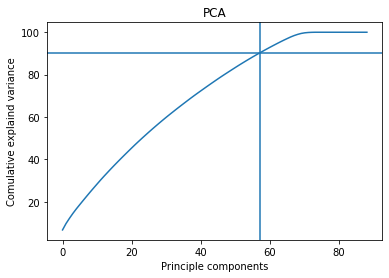

In [313]:
plt.axvline(x=components)
plt.axhline(y=90)
plt.plot(var_cumsum)
plt.title("PCA")
plt.xlabel('Principle components')
plt.ylabel('Comulative explaind variance')

From the graph, we can see 90% of the principal components are explained by 57 columns.

In [314]:
final_pca=PCA(n_components=57)
final=final_pca.fit_transform(x)

Fit this 57 columns into Standard Scaler

In [315]:
x_final=pd.DataFrame(final)
x_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,-1.034326,1.395649,0.296209,-1.039634,0.981300,1.102501,-2.627881,0.407452,-0.300566,1.085175,-1.495591,-0.509100,1.463539,0.954256,2.080834,-0.164666,0.801961,-0.672288,0.026245,-0.307354,0.895596,1.925823,0.487849,0.767764,0.106299,-0.288172,3.206213,2.269884,1.144872,-0.887636,-0.464680,-0.926214,0.544011,0.072677,0.736415,-0.144818,-0.771082,-0.680035,-0.722873,0.548225,0.734954,-1.385808,0.315679,0.966338,0.382090,-0.277286,1.057904,0.247695,0.410766,0.559360,0.217366,0.295476,0.489279,-0.801299,0.050300,-0.866949,-0.206037
1,4.238494,0.172657,0.691912,-0.675813,-1.019403,0.312040,-0.214188,1.093649,1.012884,0.101370,0.826096,0.232386,-1.059224,1.449997,-1.041287,-1.372181,-0.220864,2.444571,-0.070829,0.474641,0.783891,2.067933,0.047709,0.183469,0.138195,1.618770,0.122640,-1.024229,1.209755,1.135863,-2.232866,0.423690,-0.284471,-0.354328,0.353731,-0.773450,0.575832,2.392528,0.599210,-1.328066,-0.583955,-2.071741,1.213084,0.034453,1.795040,-0.471785,2.371919,-0.303393,0.333905,-2.142156,1.548639,-0.307936,0.548851,-2.239324,0.711744,-0.586606,0.239327
2,0.119059,-2.000060,-0.458017,-0.084732,1.672733,-1.547959,1.348722,-0.521187,-0.705231,-1.384318,0.437660,0.809798,-0.799317,0.379039,-0.380035,-0.682693,-1.869676,-1.262844,0.440713,-1.715507,1.429444,0.134713,-0.728457,0.417618,-0.927233,0.577825,-0.063361,0.268078,2.867857,-1.137956,2.734150,0.532431,1.120757,1.348756,-0.393119,1.249783,-0.246806,-0.560091,0.005838,0.065346,0.229961,-0.037116,-0.122709,0.178012,-0.342880,0.088867,2.800391,-1.522311,-1.145278,0.789250,0.974851,-2.172437,0.660915,1.212552,0.027822,0.427606,0.170603
3,-0.078818,1.420895,0.125897,-1.346222,0.215601,-1.207665,-1.776740,-1.778308,2.981044,-0.443521,-0.525860,2.557242,0.344648,0.860759,-0.822931,-1.101999,-0.914842,-0.390664,0.685273,1.285109,0.437514,-1.802171,3.542930,-0.203581,0.531967,3.719474,-2.060366,3.036970,-0.320042,-0.737806,1.153831,1.119326,-0.651090,0.099818,-1.261953,0.804673,0.533082,-2.037573,-0.953883,-0.239587,-1.786924,-0.134162,0.016335,1.044454,-0.615789,-0.609718,-0.016646,0.865442,0.873547,1.277322,1.306569,-0.150626,-0.200504,-0.244378,1.986148,1.866939,-0.783231
4,4.953690,-0.005942,0.961454,-1.516014,0.733753,-2.355971,0.406400,-1.234119,-1.045697,0.826824,2.873965,0.749019,0.495016,-0.182808,1.624900,-0.939402,-0.407539,0.617095,0.048316,-0.423817,-0.742643,-0.966614,0.541839,0.356144,-0.995092,1.176974,-2.437726,0.347433,-0.558857,2.047198,0.717543,-0.356992,-1.010288,-1.683640,0.060178,0.428736,-1.068075,0.971699,-0.357452,-0.833477,1.330842,0.112307,-0.238467,0.196345,0.640174,-0.602002,-1.874335,0.218749,-2.056452,0.258150,0.992823,-0.667843,-0.224807,-0.094722,1.624675,-0.502975,-1.441383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.410863,2.852375,-1.546839,0.294152,-0.152760,-2.122414,0.001893,-0.721154,-0.452013,-0.811313,3.189666,-0.904213,-0.287096,0.360041,-0.702757,0.607628,0.102241,-1.694679,0.023016,2.677273,-0.364980,0.055215,-1.842592,-1.332066,1.456350,1.032524,1.186604,-1.626662,-2.529049,-0.882042,-0.331392,0.372015,0.274833,-1.109295,1.985092,1.597861,-0.457272,-0.314163,-0.419640,1.818634,-1.295582,-0.303675,1.261589,-0.019138,0.259969,0.162172,-0.184885,-0.472692,0.728884,0.225917,-1.084496,0.240658,-0.483952,1.098964,0.199959,-1.471093,-0.331610
996,-3.261039,2.109046,-0.625809,-0.719998,-0.350577,-1.551192,0.213276,-0.833033,1.728510,-1.973204,-2.306678,-3.019263,1.210115,-1.239758,0.549120,-0.582895,1.357902,-0.941085,0.185303,0.314778,0.542528,-1.126537,1.160788,-0.191202,-1.580300,-0.806521,-0.262690,1.005878,-0.334241,-1.408526,-1.171614,1.508496,1.596884,0.326582,-2.522427,0.599093,-0.22

# Model Building

In [316]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve,roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [317]:
#Define a function to get the best auc_roc score and use the same function everywhere

def get_aucroc_score(model,x,y):
    max_aucroc_score=0
    for i in range(40,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=i,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        aucroc=roc_auc_score(y_test,pred_test)
        print("At",i," aucroc score is ",aucroc)
        if aucroc>max_aucroc_score:
            max_aucroc_score=aucroc
            final_i=i
    print("At",final_i,"max roc auc score is :",max_aucroc_score)
    return final_i

# Logistic Regression

In [528]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [529]:
get_aucroc_score(lgr,x,y)

At 40  aucroc score is  0.8557237464522234
At 41  aucroc score is  0.7787538856602243
At 42  aucroc score is  0.8011217732125963
At 43  aucroc score is  0.8659278280848763
At 44  aucroc score is  0.8248411947560481
At 45  aucroc score is  0.804973645087174
At 46  aucroc score is  0.8350452763887012
At 47  aucroc score is  0.8289633734288417
At 48  aucroc score is  0.7332747668603866
At 49  aucroc score is  0.8284227598324098
At 50  aucroc score is  0.8422084065414245
At 51  aucroc score is  0.8353155831869172
At 52  aucroc score is  0.8449790512231382
At 53  aucroc score is  0.8182186781997567
At 54  aucroc score is  0.858764697932153
At 55  aucroc score is  0.8659278280848763
At 56  aucroc score is  0.8220705500743344
At 57  aucroc score is  0.8427490201378565
At 58  aucroc score is  0.8212596296796864
At 59  aucroc score is  0.8422084065414245
At 60  aucroc score is  0.8526827949722935
At 61  aucroc score is  0.7873361265035815
At 62  aucroc score is  0.7988917421273145
At 63  aucroc

82

In [530]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=82,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
lgr.fit(x_train,y_train)
pred_train=lgr.predict(x_train)
pred_test=lgr.predict(x_test)
rocauc_scoreLR=roc_auc_score(y_test,pred_test)
rocauc_scoreLR

0.8962697661846195

In [550]:
clfLR_cvScore=cross_val_score(lgr,x,y,cv=8,scoring='roc_auc').mean()
clfLR_cvScore

0.8707033498296186

In [551]:
from sklearn.metrics import classification_report, confusion_matrix

# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       151
           1       0.70      0.92      0.80        49

    accuracy                           0.89       200
   macro avg       0.84      0.90      0.86       200
weighted avg       0.91      0.89      0.89       200

Confusion Matrix
 [[132  19]
 [  4  45]]


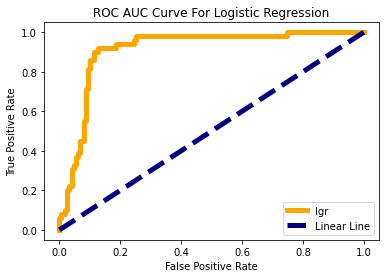

In [552]:
fpr, tpr, thresholds = roc_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='lgr',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Logistic Regression")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [553]:
clfLR_data = {'Model': ['Logistic Regression'],            
             'ROC_AUC Score': rocauc_scoreLR,
             'CV Score': clfLR_cvScore
            }

clf_LR_df = pd.DataFrame(clfLR_data)  
clf_LR_df

,Model,ROC_AUC Score,CV Score
0,Logistic Regression,0.89627,0.870703


# KNeighborsClassifier

In [329]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier()

In [385]:
get_aucroc_score(knn,x,y)

At 40  aucroc score is  0.6777267198270036
At 41  aucroc score is  0.607649682389512
At 42  aucroc score is  0.6112312474658738
At 43  aucroc score is  0.607919989187728
At 44  aucroc score is  0.6909717529395865
At 45  aucroc score is  0.6476550885254764
At 46  aucroc score is  0.5971752939586431
At 47  aucroc score is  0.6713745100689282
At 48  aucroc score is  0.6142721989458035
At 49  aucroc score is  0.7014461413704555
At 50  aucroc score is  0.6647519935126369
At 51  aucroc score is  0.6876604946614407
At 52  aucroc score is  0.6981348830923098
At 53  aucroc score is  0.630558183538316
At 54  aucroc score is  0.6369103932963914
At 55  aucroc score is  0.650696040005406
At 56  aucroc score is  0.6073793755912962
At 57  aucroc score is  0.6142721989458035
At 58  aucroc score is  0.5941343424787133
At 59  aucroc score is  0.6884714150560887
At 60  aucroc score is  0.6754966887417219
At 61  aucroc score is  0.6404919583727531
At 62  aucroc score is  0.6813082849033654
At 63  aucroc s

49

In [434]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=49,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
rocauc_scoreKNN=roc_auc_score(y_test,pred_test)
rocauc_scoreKNN

0.6975942694958779

In [436]:
clfKNN_cvScore=cross_val_score(knn,x,y,cv=5,scoring='roc_auc').mean()
clfKNN_cvScore

0.7347549020137857

In [438]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.48      0.63       151
           1       0.36      0.92      0.52        49

    accuracy                           0.58       200
   macro avg       0.66      0.70      0.58       200
weighted avg       0.80      0.58      0.61       200

Confusion Matrix
 [[72 79]
 [ 4 45]]


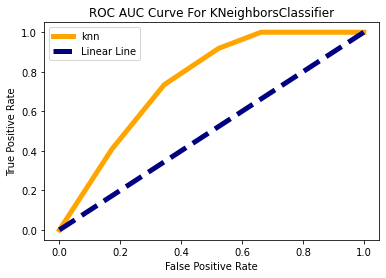

In [439]:
fpr, tpr, thresholds = roc_curve(y_test,knn.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,knn.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='knn',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For KNeighborsClassifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [440]:
clfKNN_data = {'Model': ['KNeighborsClassifier'],            
             'ROC_AUC Score': rocauc_scoreKNN,
             'CV Score': clfKNN_cvScore
            }

clf_KNN_df = pd.DataFrame(clfKNN_data)  
clf_KNN_df

,Model,ROC_AUC Score,CV Score
0,KNeighborsClassifier,0.697594,0.734755


# Decision Tree Classifier

In [441]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# creating model
decTree = DecisionTreeClassifier()
params={'criterion':['entropy','ginni'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]
        }
params

{'criterion': ['entropy', 'ginni'],
 'max_depth': [10, 15],
 'min_samples_split': [10, 11],
 'min_samples_leaf': [5, 6]}

In [468]:
grid_Search=GridSearchCV(estimator=decTree,param_grid=params,cv=5,n_jobs=-1)

grid_Search.fit(x_train,y_train)
print("Best_Params_",grid_Search.best_params_)

Best_Params_ {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [442]:
decTree=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=5,max_depth=15,min_samples_split=10)
get_aucroc_score(decTree,x,y)

At 40  aucroc score is  0.7360454115421002
At 41  aucroc score is  0.751182592242195
At 42  aucroc score is  0.7705095283146371
At 43  aucroc score is  0.7569941884038383
At 44  aucroc score is  0.7459791863765374
At 45  aucroc score is  0.7743614001892148
At 46  aucroc score is  0.7090147317205028
At 47  aucroc score is  0.7299635085822408
At 48  aucroc score is  0.6863765373699149
At 49  aucroc score is  0.6822543586971213
At 50  aucroc score is  0.729693201784025
At 51  aucroc score is  0.7266522503040952
At 52  aucroc score is  0.8072036761724557
At 53  aucroc score is  0.6883362616569807
At 54  aucroc score is  0.6781321800243276
At 55  aucroc score is  0.7365860251385322
At 56  aucroc score is  0.7779429652655764
At 57  aucroc score is  0.7032031355588593
At 58  aucroc score is  0.7360454115421002
At 59  aucroc score is  0.7398972834166779
At 60  aucroc score is  0.7911879983781591
At 61  aucroc score is  0.7189485065549399
At 62  aucroc score is  0.7335450736586026
At 63  aucroc

52

In [452]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=52,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
decTree.fit(x_train,y_train)
pred_train=decTree.predict(x_train)
pred_test=decTree.predict(x_test)
rocauc_scoreTree=roc_auc_score(y_test,pred_test)
rocauc_scoreTree

0.8005811596161643

In [454]:
clfTree_cvScore=cross_val_score(decTree,x,y,cv=5,scoring='roc_auc').mean()
clfTree_cvScore

0.7584142145334954

In [455]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       151
           1       0.71      0.69      0.70        49

    accuracy                           0.85       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.85      0.85      0.85       200

Confusion Matrix
 [[137  14]
 [ 15  34]]


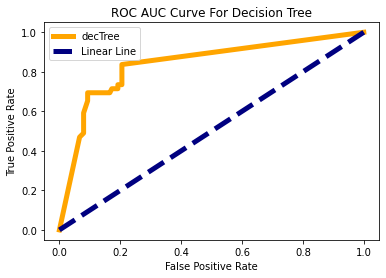

In [456]:
fpr, tpr, thresholds = roc_curve(y_test,decTree.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,decTree.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='decTree',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Decision Tree")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [457]:
clfTree_data = {'Model': ['Decison Tree Classifier'],            
             'ROC_AUC Score': rocauc_scoreTree,
             'CV Score': clfTree_cvScore
            }

clf_Tree_df = pd.DataFrame(clfTree_data)  
clf_Tree_df

,Model,ROC_AUC Score,CV Score
0,Decison Tree Classifier,0.800581,0.758414


# Naive Byes Classification

In [486]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
get_aucroc_score(nb,x,y)

At 40  aucroc score is  0.7991620489255306
At 41  aucroc score is  0.7555750777132044
At 42  aucroc score is  0.7680091904311394
At 43  aucroc score is  0.7757129341802946
At 44  aucroc score is  0.8320043249087715
At 45  aucroc score is  0.7423300446006217
At 46  aucroc score is  0.6854980402757129
At 47  aucroc score is  0.7685498040275712
At 48  aucroc score is  0.6612380051358292
At 49  aucroc score is  0.7616569806730639
At 50  aucroc score is  0.7415191242059738
At 51  aucroc score is  0.7486822543586971
At 52  aucroc score is  0.858764697932153
At 53  aucroc score is  0.7249628328152452
At 54  aucroc score is  0.7644276253547777
At 55  aucroc score is  0.8192999053926207
At 56  aucroc score is  0.7122584132990945
At 57  aucroc score is  0.7158399783754562
At 58  aucroc score is  0.7688201108257873
At 59  aucroc score is  0.7624679010677119
At 60  aucroc score is  0.6811055548047034
At 61  aucroc score is  0.7517232058386268
At 62  aucroc score is  0.7963914042438167
At 63  aucro

52

In [487]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=52,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
nb.fit(x_train,y_train)
pred_train=nb.predict(x_train)
pred_test=nb.predict(x_test)
rocauc_scoreNB=roc_auc_score(y_test,pred_test)
rocauc_scoreNB

0.8562643600486551

In [493]:
clfNB_cvScore=cross_val_score(nb,x,y,cv=5,scoring='roc_auc').mean()
clfNB_cvScore

0.8241979348560615

In [494]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.81      0.88       151
           1       0.61      0.90      0.73        49

    accuracy                           0.83       200
   macro avg       0.79      0.86      0.80       200
weighted avg       0.88      0.83      0.84       200

Confusion Matrix
 [[123  28]
 [  5  44]]


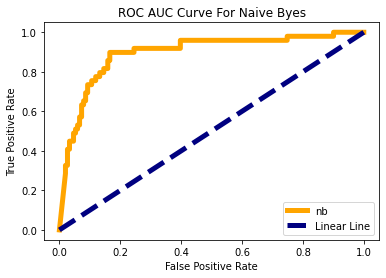

In [495]:
fpr, tpr, thresholds = roc_curve(y_test,nb.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,nb.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='nb',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Naive Byes")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [496]:
clfNB_data = {'Model': ['Gaussian NB'],            
             'ROC_AUC Score': rocauc_scoreNB,
             'CV Score': clfNB_cvScore
            }

clf_NB_df = pd.DataFrame(clfNB_data)  
clf_NB_df

,Model,ROC_AUC Score,CV Score
0,Gaussian NB,0.856264,0.824198


# Random Forest Classifier

In [497]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
clf_rf = RandomForestClassifier()
params={'n_estimators':[100,150],
        'criterion':['entropy','ginni'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]
        }
params

{'n_estimators': [100, 150],
 'criterion': ['entropy', 'ginni'],
 'max_depth': [10, 15],
 'min_samples_split': [10, 11],
 'min_samples_leaf': [5, 6]}

In [488]:
grd=GridSearchCV(clf_rf,param_grid=params)
grd.fit(x_train,y_train)
print("Best_Params_",grd.best_params_)

Best_Params_ {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150}


In [498]:
forest=RandomForestClassifier(criterion='entropy', max_depth= 15, min_samples_leaf= 5,min_samples_split=10, n_estimators=150)

In [499]:
get_aucroc_score(forest,x,y)

At 40  aucroc score is  0.8791728611974592
At 41  aucroc score is  0.7547641573185565
At 42  aucroc score is  0.7944992566563048
At 43  aucroc score is  0.859035004730369
At 44  aucroc score is  0.8317340181105555
At 45  aucroc score is  0.835856196783349
At 46  aucroc score is  0.804433031490742
At 47  aucroc score is  0.8695093931612381
At 48  aucroc score is  0.8115961616434654
At 49  aucroc score is  0.8047033382889579
At 50  aucroc score is  0.8728206514393838
At 51  aucroc score is  0.814907419921611
At 52  aucroc score is  0.8276118394377618
At 53  aucroc score is  0.8281524530341939
At 54  aucroc score is  0.8521421813758616
At 55  aucroc score is  0.8557237464522234
At 56  aucroc score is  0.8391674550614948
At 57  aucroc score is  0.8184889849979726
At 58  aucroc score is  0.7972699013380186
At 59  aucroc score is  0.814907419921611
At 60  aucroc score is  0.8521421813758616
At 61  aucroc score is  0.8077442897688878
At 62  aucroc score is  0.8361265035815652
At 63  aucroc sc

63

In [506]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=63,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
forest.fit(x_train,y_train)
pred_test=forest.predict(x_test)
rocauc_scoreForest=roc_auc_score(y_test,pred_test)
rocauc_scoreForest

0.8891066360318962

In [509]:
clfForest_cvScore=cross_val_score(forest,x,y,cv=5,scoring='roc_auc').mean()
clfForest_cvScore

0.8476297914132539

In [510]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       151
           1       0.74      0.88      0.80        49

    accuracy                           0.90       200
   macro avg       0.85      0.89      0.87       200
weighted avg       0.90      0.90      0.90       200

Confusion Matrix
 [[136  15]
 [  6  43]]


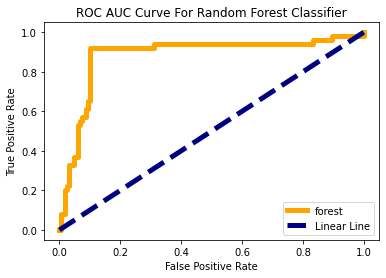

In [511]:
fpr, tpr, thresholds = roc_curve(y_test,forest.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,forest.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='forest',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Random Forest Classifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [512]:
clfForest_data = {'Model': ['RandomForestClassifier'],            
             'ROC_AUC Score': rocauc_scoreForest,
             'CV Score': clfForest_cvScore
            }

clf_Forest_df = pd.DataFrame(clfForest_data)  
clf_Forest_df

,Model,ROC_AUC Score,CV Score
0,RandomForestClassifier,0.889107,0.84763


# Gradient Boost Classifier

In [557]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier()

In [558]:
params={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,150]
           }
params

{'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 50, 100, 150]}

In [552]:
clf = GridSearchCV(gb_clf, params, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [559]:
gb_clf=GradientBoostingClassifier(learning_rate=0.1,n_estimators=150)
get_aucroc_score(gb_clf,x,y)

At 40  aucroc score is  0.8284227598324098
At 41  aucroc score is  0.750641978645763
At 42  aucroc score is  0.78375456142722
At 43  aucroc score is  0.814637113123395
At 44  aucroc score is  0.794228949858089
At 45  aucroc score is  0.7641573185565617
At 46  aucroc score is  0.8110555480470333
At 47  aucroc score is  0.7975402081362347
At 48  aucroc score is  0.7807136099472901
At 49  aucroc score is  0.7771320448709286
At 50  aucroc score is  0.8281524530341939
At 51  aucroc score is  0.8281524530341939
At 52  aucroc score is  0.813826192728747
At 53  aucroc score is  0.7735504797945667
At 54  aucroc score is  0.7396269766184619
At 55  aucroc score is  0.7944992566563048
At 56  aucroc score is  0.794769563454521
At 57  aucroc score is  0.7536829301256925
At 58  aucroc score is  0.7564535748074065
At 59  aucroc score is  0.7873361265035815
At 60  aucroc score is  0.8281524530341939
At 61  aucroc score is  0.7564535748074065
At 62  aucroc score is  0.7674685768347073
At 63  aucroc scor

63

In [562]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=63,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
gb_clf.fit(x_train,y_train)
pred_train=gb_clf.predict(x_train)
pred_test=gb_clf.predict(x_test)
rocauc_scoreGBC=roc_auc_score(y_test,pred_test)
rocauc_scoreGBC

0.8311934045141235

In [568]:
clfGBC_cvScore=cross_val_score(gb_clf,x,y,cv=5,scoring='roc_auc').mean()
clfGBC_cvScore

0.852594606478353

In [569]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       151
           1       0.73      0.76      0.74        49

    accuracy                           0.87       200
   macro avg       0.82      0.83      0.83       200
weighted avg       0.87      0.87      0.87       200

Confusion Matrix
 [[137  14]
 [ 12  37]]


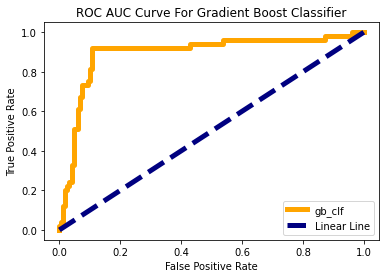

In [570]:
fpr, tpr, thresholds = roc_curve(y_test,gb_clf.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,gb_clf.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='gb_clf',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Gradient Boost Classifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [571]:
clfGBC_data = {'Model': ['Gradient Boost Classifier'],            
             'ROC_AUC Score': rocauc_scoreGBC,
             'CV Score': clfGBC_cvScore
            }

clf_GBC_df = pd.DataFrame(clfGBC_data)  
clf_GBC_df

,Model,ROC_AUC Score,CV Score
0,Gradient Boost Classifier,0.831193,0.852595


# AdaBoost Classifier

In [572]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier()

In [573]:
params={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,20,50,100]
           }
params

{'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 20, 50, 100]}

In [610]:
clf = GridSearchCV(ada_clf, params, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [574]:
ada_clf=AdaBoostClassifier(learning_rate=0.1,n_estimators=100)
get_aucroc_score(ada_clf,x,y)

At 40  aucroc score is  0.8863359913501825
At 41  aucroc score is  0.7988917421273145
At 42  aucroc score is  0.8115961616434654
At 43  aucroc score is  0.8830247330720367
At 44  aucroc score is  0.8383565346668469
At 45  aucroc score is  0.8322746317069875
At 46  aucroc score is  0.8689687795648061
At 47  aucroc score is  0.8661981348830924
At 48  aucroc score is  0.8184889849979726
At 49  aucroc score is  0.859035004730369
At 50  aucroc score is  0.8830247330720367
At 51  aucroc score is  0.8521421813758616
At 52  aucroc score is  0.8855250709555346
At 53  aucroc score is  0.8314637113123394
At 54  aucroc score is  0.8653872144884444
At 55  aucroc score is  0.8455196648195703
At 56  aucroc score is  0.8460602784160021
At 57  aucroc score is  0.8559940532504392
At 58  aucroc score is  0.8893769428301123
At 59  aucroc score is  0.8422084065414245
At 60  aucroc score is  0.8827544262738208
At 61  aucroc score is  0.804433031490742
At 62  aucroc score is  0.8328152453034193
At 63  aucroc

58

In [575]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=58,test_size=0.20,stratify=target)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
ada_clf.fit(x_train,y_train)
pred_train=ada_clf.predict(x_train)
pred_test=ada_clf.predict(x_test)
rocauc_scoreADA=roc_auc_score(y_test,pred_test)
rocauc_scoreADA

0.8893769428301123

In [576]:
clfADA_cvScore=cross_val_score(ada_clf,x,y,cv=5,scoring='roc_auc').mean()
clfADA_cvScore

0.83870856422039

In [577]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       151
           1       0.71      0.90      0.79        49

    accuracy                           0.89       200
   macro avg       0.84      0.89      0.86       200
weighted avg       0.90      0.89      0.89       200

Confusion Matrix
 [[133  18]
 [  5  44]]


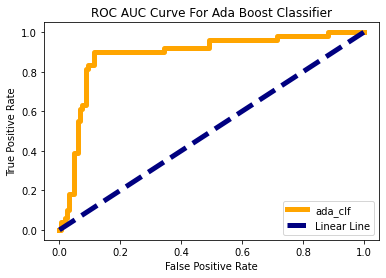

In [578]:
fpr, tpr, thresholds = roc_curve(y_test,ada_clf.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,ada_clf.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='ada_clf',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Ada Boost Classifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [579]:
clfADA_data = {'Model': ['Ada Boost Classifier'],            
             'ROC_AUC Score': rocauc_scoreADA,
             'CV Score': clfADA_cvScore
            }

clf_ADA_df = pd.DataFrame(clfADA_data)  
clf_ADA_df

,Model,ROC_AUC Score,CV Score
0,Ada Boost Classifier,0.889377,0.838709


In [580]:
modelDF=pd.concat([clf_LR_df,clf_KNN_df,clf_Tree_df,clf_NB_df,clf_Forest_df,clf_ADA_df,clf_GBC_df]).reset_index()
modelDF.drop(columns=['index'],axis=1,inplace=True)
modelDF

,Model,ROC_AUC Score,CV Score
0,Logistic Regression,0.896270,0.870703
1,KNeighborsClassifier,0.697594,0.734755
2,Decison Tree Classifier,0.800581,0.758414
3,Gaussian NB,0.856264,0.824198
4,RandomForestClassifier,0.889107,0.847630
5,Ada Boost Classifier,0.889377,0.838709
6,Gradient Boost Classifier,0.831193,0.852595


# Plottting combined ROC AUC Curve

In [581]:
roc_auc_dict = {} #ROC AUC dict for TPR and FPR values
precision_recall_dict = {} #precision recall dictionary

def modify_roc_auc_dict(clf, y_test, x_test, name ,modify_dictionary):
    # Modifies a dictionary in place and adds keys for ROC AUC metrics
    fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
    clf_roc_auc_dict = {'fpr':fpr, 'tpr': tpr, 'thresholds': thresholds}
    modify_dictionary[name] = clf_roc_auc_dict
    
def modify_precision_recall_dict(clf, y_test, x_test, name ,modify_dictionary):
    # Modifies a dictionary in place and adds keys for precision recall metrics
    precision, recall, thresholds = precision_recall_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
    precision_recall_dict = {'precision':precision, 'recall': recall, 'thresholds': thresholds}
    modify_dictionary[name] = precision_recall_dict

In [582]:
def fit_clf(clf, x_train, y_train, x_test, y_test, name='clf'): 
    clf.fit(x_train, y_train) 
    y_pred = clf.predict(x_test)
    class_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    class_report['clf'] = name 
    return class_report

In [583]:
lgr_report = fit_clf(lgr, x_train, y_train, x_test, y_test, name='Logistic Regression')
lgr_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.924138,0.690909,0.86,0.807524,0.866997,Logistic Regression
recall,0.887417,0.775510,0.86,0.831464,0.860000,Logistic Regression
f1-score,0.905405,0.730769,0.86,0.818087,0.862620,Logistic Regression
support,151.000000,49.000000,0.86,200.000000,200.000000,Logistic Regression


In [584]:
knn_report = fit_clf(knn, x_train, y_train, x_test, y_test, name='KNeighborsClassifier')
knn_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.898551,0.320611,0.52,0.609581,0.756955,KNeighborsClassifier
recall,0.410596,0.857143,0.52,0.633869,0.520000,KNeighborsClassifier
f1-score,0.563636,0.466667,0.52,0.515152,0.539879,KNeighborsClassifier
support,151.000000,49.000000,0.52,200.000000,200.000000,KNeighborsClassifier


In [585]:
tree_report = fit_clf(decTree, x_train, y_train, x_test, y_test, name='DecisionTreeClassifier')
tree_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.869565,0.717949,0.84,0.793757,0.832419,DecisionTreeClassifier
recall,0.927152,0.571429,0.84,0.749290,0.840000,DecisionTreeClassifier
f1-score,0.897436,0.636364,0.84,0.766900,0.833473,DecisionTreeClassifier
support,151.000000,49.000000,0.84,200.000000,200.000000,DecisionTreeClassifier


In [586]:
naiveByes_report = fit_clf(nb, x_train, y_train, x_test, y_test, name='NaiveByesClassifier')
naiveByes_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.915966,0.481481,0.74,0.698724,0.809518,NaiveByesClassifier
recall,0.721854,0.795918,0.74,0.758886,0.740000,NaiveByesClassifier
f1-score,0.807407,0.600000,0.74,0.703704,0.756593,NaiveByesClassifier
support,151.000000,49.000000,0.74,200.000000,200.000000,NaiveByesClassifier


In [587]:
forest_report = fit_clf(forest, x_train, y_train, x_test, y_test, name='RandomForestClassifier')
forest_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.937063,0.701754,0.87,0.819409,0.879412,RandomForestClassifier
recall,0.887417,0.816327,0.87,0.851872,0.870000,RandomForestClassifier
f1-score,0.911565,0.754717,0.87,0.833141,0.873137,RandomForestClassifier
support,151.000000,49.000000,0.87,200.000000,200.000000,RandomForestClassifier


In [588]:
gradient_report = fit_clf(gb_clf, x_train, y_train, x_test, y_test, name='GradientBoostClassifier')
gradient_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.889610,0.695652,0.845,0.792631,0.842091,GradientBoostClassifier
recall,0.907285,0.653061,0.845,0.780173,0.845000,GradientBoostClassifier
f1-score,0.898361,0.673684,0.845,0.786022,0.843315,GradientBoostClassifier
support,151.000000,49.000000,0.845,200.000000,200.000000,GradientBoostClassifier


In [589]:
ada_report = fit_clf(ada_clf, x_train, y_train, x_test, y_test, name='AdaBoostClassifier')
ada_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.963768,0.709677,0.885,0.836723,0.901516,AdaBoostClassifier
recall,0.880795,0.897959,0.885,0.889377,0.885000,AdaBoostClassifier
f1-score,0.920415,0.792793,0.885,0.856604,0.889148,AdaBoostClassifier
support,151.000000,49.000000,0.885,200.000000,200.000000,AdaBoostClassifier


In [590]:
#Lets Check the Keys which we have
roc_auc_dict.keys()

dict_keys([])

In [591]:
modify_roc_auc_dict(clf=lgr,y_test=y_test,x_test=x_test,name='LogisticRegresssion',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=knn,y_test=y_test,x_test=x_test,name='KNeighborsClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=decTree,y_test=y_test,x_test=x_test,name='DecisionTreeClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=forest,y_test=y_test,x_test=x_test,name='RandomForestClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=nb,y_test=y_test,x_test=x_test,name='NaiveByes',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=gb_clf,y_test=y_test,x_test=x_test,name='GradientBoostClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=ada_clf,y_test=y_test,x_test=x_test,name='AdaBoostClassifier',modify_dictionary=roc_auc_dict)

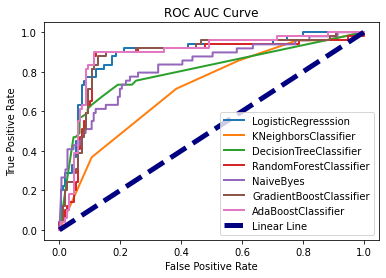

In [592]:
for key in roc_auc_dict:
    clf = roc_auc_dict[key]
    plt.plot(clf['fpr'], clf['tpr'], label=key,lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()
plt.show()

# Selecting the Model

Logistic Regression, AdaBoost and Naive Byes are three best performing model but out of this Logistic regression is best as it has the highest roc_auc score and the difference between roc_auc score and cv score is least for Linear Regression. Hence we will select Logistic Regression for our delecting thr Insurance Claims Fraud Detection.

# Predict Test cases

In [602]:
#Predicting the test cases
predict_InsuranceFraud = pd.DataFrame( { 'actual':  y_test,
                                      'predicted': lgr.predict( x_test),
                                      'Correctly_Predicted':(y_test)-(lgr.predict(x_test))
                                    } )
predict_InsuranceFraud

,actual,predicted,Correctly_Predicted
937,0,0,0
251,1,1,0
485,0,0,0
810,0,0,0
296,0,0,0
...,...,...,...
66,1,0,1
875,1,1,0
856,0,0,0
63,1,0,1


In [603]:
predict_InsuranceFraud = predict_InsuranceFraud.reset_index()

In [604]:
predict_InsuranceFraud['Correctly_Predicted'].value_counts()

 0    172
-1     17
 1     11
Name: Correctly_Predicted, dtype: int64

We see that 172 records were precited correctly out of 200,Thereby having an <strong>accuracy of 86%</strong>, Hence our model is performing well

<AxesSubplot:xlabel='Correctly_Predicted', ylabel='count'>

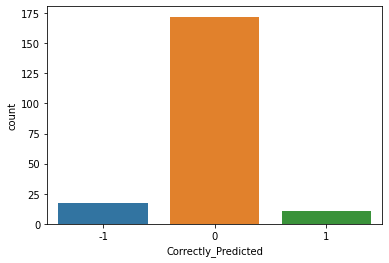

In [605]:
sns.countplot(predict_InsuranceFraud.Correctly_Predicted)

# Saving the model

In [606]:
from joblib import dump , load
dump(lgr,'InsuranceClaimFraud.joblib')
lgr_load=load('InsuranceClaimFraud.joblib')

In [607]:
from tempfile import mkdtemp
savedir = mkdtemp()
import os
filename = os.path.join(savedir, 'InsuranceClaimFraud.joblib')

In [608]:
import joblib
joblib.dump(lgr, filename)

['C:\\Users\\mum1user\\AppData\\Local\\Temp\\tmp4be024mx\\InsuranceClaimFraud.joblib']

In [609]:
joblib.load(filename)

LogisticRegression()